In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getData(file):
    if file.endswith('.xz'): file = lzma.open(file, 'rt')
    data = pd.read_json(file)
    data = data.sort_values(['file', 'method'])
    
    # Adding a column for the database
    data['db'] = -1 + \
        (0+1)*data.file.str.endswith(')') + \
        (1+1)*data.file.str.contains('/Prover9--') + \
        (2+1)*data.file.str.contains('/E---1') + \
        (3+1)*data.file.str.contains('/leanCoP--') + \
        (4+1)*data.file.str.contains('/QF_UF/')
    
    data['status'] = data.status.fillna("timeout_" + data.phase)
    
    return data

In [3]:
filename = "results.json.xz"
data = None
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
data_other_exp[['method', 'file', 'status']]

method                                               file  \
689935       1_1_maxsat          FactorialFunctionEqualityExampleProof(13)   
720090         1_dtable          FactorialFunctionEqualityExampleProof(51)   
720093         1_maxsat          FactorialFunctionEqualityExampleProof(51)   
720091       2_2_maxsat          FactorialFunctionEqualityExampleProof(51)   
1073482        1_dtable          FactorialFunctionEqualityExampleProof(52)   
1073483      2_2_maxsat          FactorialFunctionEqualityExampleProof(52)   
1073484        reforest          FactorialFunctionEqualityExampleProof(52)   
378119       1_1_maxsat          FactorialFunctionEqualityExampleProof(53)   
378125         1_maxsat          FactorialFunctionEqualityExampleProof(53)   
217479       1_1_maxsat          FactorialFunctionEqualityExampleProof(54)   
217482         1_dtable          FactorialFunctionEqualityExampleProof(54)   
217480         2_maxsat          FactorialFunctionEqualityExampleProof(54)   
217481      many_dtable          FactorialFunctionEqualityExampleProof(54)   
217484         reforest          FactorialFunctionEqualityExampleProof(54)   
1056447      1_1_maxsat          FactorialFunctionEqualityExampleProof(55)   
1056449     many_dtable          FactorialFunctionEqualityExampleProof(55)   
1056454  many_dtable_ss          FactorialFunctionEqualityExampleProof(55)   
694490         1_dtable          FactorialFunctionEqualityExampleProof(56)   
694493         1_maxsat          FactorialFunctionEqualityExampleProof(56)   
694488         2_maxsat          FactorialFunctionEqualityExampleProof(56)   
694494   many_dtable_ss          FactorialFunctionEqualityExampleProof(56)   
576351       1_1_maxsat          FactorialFunctionEqualityExampleProof(57)   
576352         2_maxsat          FactorialFunctionEqualityExampleProof(57)   
576353      many_dtable          FactorialFunctionEqualityExampleProof(57)   
576356         reforest          FactorialFunctionEqualityExampleProof(57)   
993183       1_1_maxsat          FactorialFunctionEqualityExampleProof(58)   
993186         1_dtable          FactorialFunctionEqualityExampleProof(58)   
993189         1_maxsat          FactorialFunctionEqualityExampleProof(58)   
993187       2_2_maxsat          FactorialFunctionEqualityExampleProof(58)   
993190   many_dtable_ss          FactorialFunctionEqualityExampleProof(58)   
644375       1_1_maxsat          FactorialFunctionEqualityExampleProof(59)   
644378         1_dtable          FactorialFunctionEqualityExampleProof(59)   
644381         1_maxsat          FactorialFunctionEqualityExampleProof(59)   
644376         2_maxsat          FactorialFunctionEqualityExampleProof(59)   
644377      many_dtable          FactorialFunctionEqualityExampleProof(59)   
644382   many_dtable_ss          FactorialFunctionEqualityExampleProof(59)   
644380         reforest          FactorialFunctionEqualityExampleProof(59)   
342639       1_1_maxsat          FactorialFunctionEqualityExampleProof(60)   
342645         1_maxsat          FactorialFunctionEqualityExampleProof(60)   
342643       2_2_maxsat          FactorialFunctionEqualityExampleProof(60)   
342644         reforest          FactorialFunctionEqualityExampleProof(60)   
459071       1_1_maxsat          FactorialFunctionEqualityExampleProof(61)   
459074         1_dtable          FactorialFunctionEqualityExampleProof(61)   
459077         1_maxsat          FactorialFunctionEqualityExampleProof(61)   
459075       2_2_maxsat          FactorialFunctionEqualityExampleProof(61)   
459072         2_maxsat          FactorialFunctionEqualityExampleProof(61)   
459073      many_dtable          FactorialFunctionEqualityExampleProof(61)   
459078   many_dtable_ss          FactorialFunctionEqualityExampleProof(61)   
1004975      1_1_maxsat          FactorialFunctionEqualityExampleProof(62)   
1004978        1_dtable          FactorialFunctionEqualityExampleProof(62)   
...                 ...                

In [5]:
# Test that fail for 1_dtable and are ok in 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat == 'ok') & (merged.status_dtable != 'ok')][['file', 'status_dtable']]

file  \
214                              LinearEqExampleProof(19)   
216                              LinearEqExampleProof(20)   
217                              LinearEqExampleProof(21)   
218                              LinearEqExampleProof(22)   
219                              LinearEqExampleProof(23)   
220                              LinearEqExampleProof(24)   
317                                LinearExampleProof(20)   
322                                LinearExampleProof(25)   
323                                LinearExampleProof(26)   
371                                 LinearExampleProof(7)   
416                        SquareDiagonalExampleProof(19)   
418                        SquareDiagonalExampleProof(20)   
419                        SquareDiagonalExampleProof(21)   
420                        SquareDiagonalExampleProof(22)   
421                        SquareDiagonalExampleProof(23)   
422                        SquareDiagonalExampleProof(24)   
423                        SquareDiagonalExampleProof(25)   
424                        SquareDiagonalExampleProof(26)   
517                       SquareEdges2DimExampleProof(19)   
551                        SquareEdges2DimExampleProof(5)   
621                           SquareEdgesExampleProof(21)   
622                           SquareEdgesExampleProof(22)   
624                           SquareEdgesExampleProof(24)   
625                           SquareEdgesExampleProof(25)   
819                             SumOfOnesExampleProof(18)   
820                             SumOfOnesExampleProof(19)   
822                             SumOfOnesExampleProof(20)   
823                             SumOfOnesExampleProof(21)   
824                             SumOfOnesExampleProof(22)   
825                             SumOfOnesExampleProof(23)   
826                             SumOfOnesExampleProof(24)   
918                           SumOfOnesF2ExampleProof(16)   
919                           SumOfOnesF2ExampleProof(17)   
920                           SumOfOnesF2ExampleProof(18)   
921                           SumOfOnesF2ExampleProof(19)   
923                           SumOfOnesF2ExampleProof(20)   
925                           SumOfOnesF2ExampleProof(22)   
1017                           SumOfOnesFExampleProof(14)   
1018                           SumOfOnesFExampleProof(15)   
1019                           SumOfOnesFExampleProof(16)   
1020                           SumOfOnesFExampleProof(17)   
1021                           SumOfOnesFExampleProof(18)   
1022                           SumOfOnesFExampleProof(19)   
1024                           SumOfOnesFExampleProof(20)   
2851    proofs/Solutions/ALG/ALG071+1/VampireZ3---1.0....   
2860    proofs/Solutions/ALG/ALG072+1/SInE---0.4.THM-C...   
4739    proofs/Solutions/ALG/ALG210+2/SInE---0.4.THM-C...   
4793    proofs/Solutions/ALG/ALG215+1/SInE---0.4.THM-C...   
4805     proofs/Solutions/ALG/ALG215+4/ET---0.2.THM-CRf.s   
4838    proofs/Solutions/ALG/ALG218+1/E---1.9.1.THM-CRf.s   
...                                                   ...   
121099   proofs/Solutions/SWW/SWW102+1/ET---0.2.THM-CRf.s   
121106  proofs/Solutions/SWW/SWW102+1/Vampire---4.0.TH...   
121290   proofs/Solutions/SWW/SWW207+1/ET---0.2.THM-CRf.s   
121516  proofs/Solutions/SWW/SWW231+1/E---1.9.1.THM-CRf.s   
121517  proofs/Solutions/SWW/SWW231+1/E---FNT-1.9.1.TH...   
121633  proofs/Solutions/SWW/SWW255+1/E---1.9.1.THM-CRf.s   
121634  proofs/Solutions/SWW/SWW255+1/E---FNT-1.9.1.TH...   
121874  proofs/Solutions/SWW/SWW296+1/E---1.9.1.THM-CRf.s   
121875  proofs/Solutions/SWW/SWW296+1/E---FNT-1.9.1.TH...   
121940  proofs/Solutions/SWW/SWW306+1/E---FNT-1.9.1.TH...   
122033  proofs/Solutions/SWW/SWW319+1/E---FNT-1.9.1.TH...   
122087  proofs/Solutions/SWW/SWW329+1/E---FNT-1.9.1.TH...   
122213  proofs/Solutions/SWW/SWW351+1/E---FNT-1.9.1.TH...   
122245  proofs/Solutions/SWW/SWW358+1/E---1.9.1.THM-CRf.s   
122246  proofs/Solutions/SW

In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat != 'ok') & (merged.status_dtable == 'ok')][['file', 'status_maxsat']]

file  \
312                                LinearExampleProof(16)   
338                                 LinearExampleProof(4)   
360                                 LinearExampleProof(6)   
393                                 LinearExampleProof(9)   
510                       SquareEdges2DimExampleProof(12)   
514                       SquareEdges2DimExampleProof(16)   
515                       SquareEdges2DimExampleProof(17)   
584                        SquareEdges2DimExampleProof(8)   
611                           SquareEdgesExampleProof(12)   
613                           SquareEdgesExampleProof(14)   
615                           SquareEdgesExampleProof(16)   
617                           SquareEdgesExampleProof(18)   
663                            SquareEdgesExampleProof(6)   
685                            SquareEdgesExampleProof(8)   
915                           SumOfOnesF2ExampleProof(13)   
1348    proofs/QF_UF/eq_diamond/eq_diamond2.smt2.proof...   
1352    proofs/QF_UF/eq_diamond/eq_diamond6.smt2.proof...   
1353    proofs/QF_UF/eq_diamond/eq_diamond7.smt2.proof...   
1894    proofs/Solutions/AGT/AGT026+1/leanCoP---2.2.TH...   
1954    proofs/Solutions/ALG/ALG006-1/E---1.9.1.UNS-CRf.s   
1955    proofs/Solutions/ALG/ALG006-1/E---FNT-1.9.1.UN...   
2269    proofs/Solutions/ALG/ALG029+1/Beagle---0.9.22....   
2272    proofs/Solutions/ALG/ALG029+1/E---1.9.1.THM-CRf.s   
2273    proofs/Solutions/ALG/ALG029+1/E---FNT-1.9.1.TH...   
2283    proofs/Solutions/ALG/ALG029+1/Vampire---4.0.TH...   
2298    proofs/Solutions/ALG/ALG030+1/SInE---0.4.THM-C...   
2829    proofs/Solutions/ALG/ALG070+1/SInE---0.4.THM-C...   
4193     proofs/Solutions/ALG/ALG177+1/ET---0.2.THM-CRf.s   
4598     proofs/Solutions/ALG/ALG203+1/ET---0.2.THM-CRf.s   
4743    proofs/Solutions/ALG/ALG210+2/VampireZ3---1.0....   
5048    proofs/Solutions/ALG/ALG337-1/SPASS---3.7.UNS-...   
5062    proofs/Solutions/ALG/ALG340-1/Beagle---0.9.22....   
5101     proofs/Solutions/ALG/ALG347-1/ET---0.2.UNS-CRf.s   
5353    proofs/Solutions/ALG/ALG378-1/E---1.9.1.UNS-CRf.s   
5354    proofs/Solutions/ALG/ALG378-1/E---FNT-1.9.1.UN...   
5417    proofs/Solutions/ALG/ALG385-1/SNARK---20120808...   
5424    proofs/Solutions/ALG/ALG386-1/SNARK---20120808...   
5496    proofs/Solutions/ALG/ALG398-1/E---1.9.1.UNS-CRf.s   
5497    proofs/Solutions/ALG/ALG398-1/E---FNT-1.9.1.UN...   
5542    proofs/Solutions/ALG/ALG402-1/SPASS---3.7.UNS-...   
5582     proofs/Solutions/ALG/ALG407-1/ET---0.2.UNS-CRf.s   
5689     proofs/Solutions/ALG/ALG426-1/ET---0.2.UNS-CRf.s   
5694    proofs/Solutions/ALG/ALG427-1/E---1.9.1.UNS-CRf.s   
5695    proofs/Solutions/ALG/ALG427-1/E---FNT-1.9.1.UN...   
5713    proofs/Solutions/ALG/ALG429-1/E---1.9.1.UNS-CRf.s   
5714    proofs/Solutions/ALG/ALG429-1/E---FNT-1.9.1.UN...   
5715     proofs/Solutions/ALG/ALG429-1/ET---0.2.UNS-CRf.s   
5765    proofs/Solutions/ALG/ALG437-1/E---1.9.1.UNS-CRf.s   
5766    proofs/Solutions/ALG/ALG437-1/E---FNT-1.9.1.UN...   
5770    proofs/Solutions/ALG/ALG437-1/VampireZ3---1.0....   
...                                                   ...   
133507  proofs/Solutions/SYN/SYN559-1/SPASS---3.7.UNS-...   
133508  proofs/Solutions/SYN/SYN559-1/Vampire---4.0.UN...   
133531   proofs/Solutions/SYN/SYN561-1/ET---0.2.UNS-CRf.s   
133533  proofs/Solutions/SYN/SYN561-1/Otter---3.3.UNS-...   
133535  proofs/Solutions/SYN/SYN561-1/SNARK---20120808...   
133537  proofs/Solutions/SYN/SYN561-1/SPASS---3.7.UNS-...   
133669  proofs/Solutions/SYN/SYN570-1/Beagle---0.9.22....   
133768  proofs/Solutions/SYN/SYN576-1/Prover9---1109a....   
134280  proofs/Solutions/SYN/SYN613-1/Beagle---0.9.22....   
134283  proofs/Solutions/SYN/SYN613-1/E---1.9.1.UNS-CRf.s   
134284  proofs/Solutions/SYN/SYN613-1/E---FNT-1.9.1.UN...   
134292  proofs/Solutions/SYN/SYN613-1/Vampire---4.0.UN...   
134325  proofs/Solutions/SYN/SYN617-1/E---1.9.1.UNS-CRf.s   
134326  proofs/Solutions/SYN/SYN617-1/E---FNT-1.9.1.UN...   
134648  proofs/Solutions/SY

In [7]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'E',
    3: 'LeanCoP',
    4: 'VeriT',
}

dbs = { i: dbs[i] for i in dbs.keys() if i in data.db.values }

In [8]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 1212
Proof examples - 1_dtable: 1212
Proof examples - 1_maxsat: 1212
Proof examples - 2_2_maxsat: 1212
Proof examples - 2_maxsat: 1212
Proof examples - many_dtable: 1212
Proof examples - many_dtable_ss: 1212
Proof examples - reforest: 1212

Prover9 - 1_1_maxsat: 6394
Prover9 - 1_dtable: 6394
Prover9 - 1_maxsat: 6394
Prover9 - 2_2_maxsat: 6394
Prover9 - 2_maxsat: 6394
Prover9 - many_dtable: 6394
Prover9 - many_dtable_ss: 6394
Prover9 - reforest: 6394

E - 1_1_maxsat: 9895
E - 1_dtable: 9895
E - 1_maxsat: 9895
E - 2_2_maxsat: 9895
E - 2_maxsat: 9895
E - many_dtable: 9895
E - many_dtable_ss: 9895
E - reforest: 9895

LeanCoP - 1_1_maxsat: 2738
LeanCoP - 1_dtable: 2738
LeanCoP - 1_maxsat: 2738
LeanCoP - 2_2_maxsat: 2738
LeanCoP - 2_maxsat: 2738
LeanCoP - many_dtable: 2738
LeanCoP - many_dtable_ss: 2738
LeanCoP - reforest: 2738

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 14

In [9]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

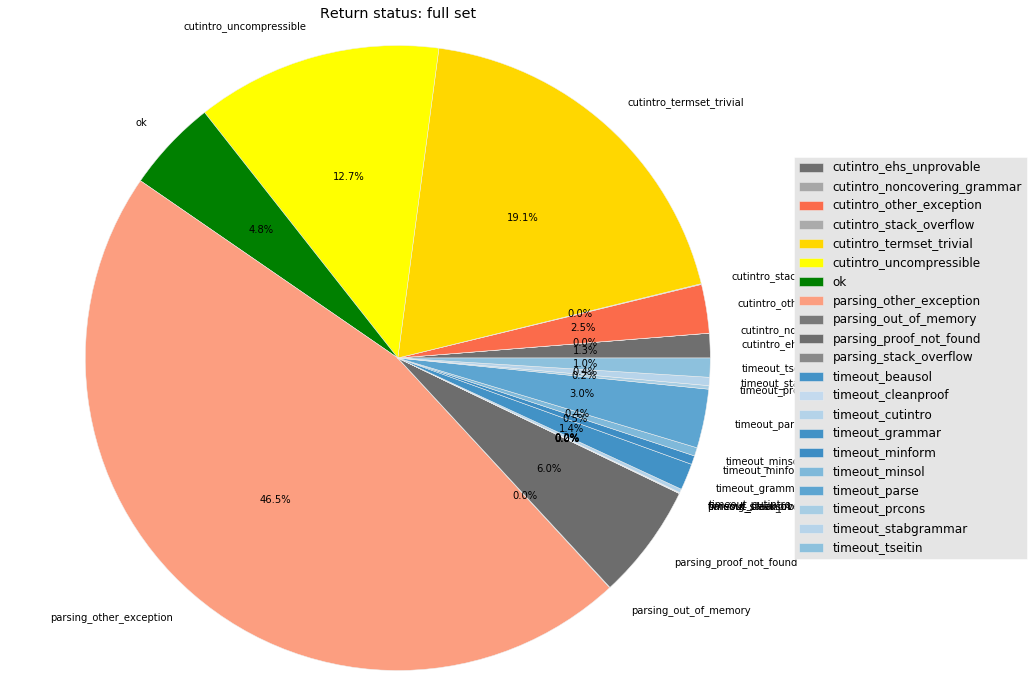

In [10]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

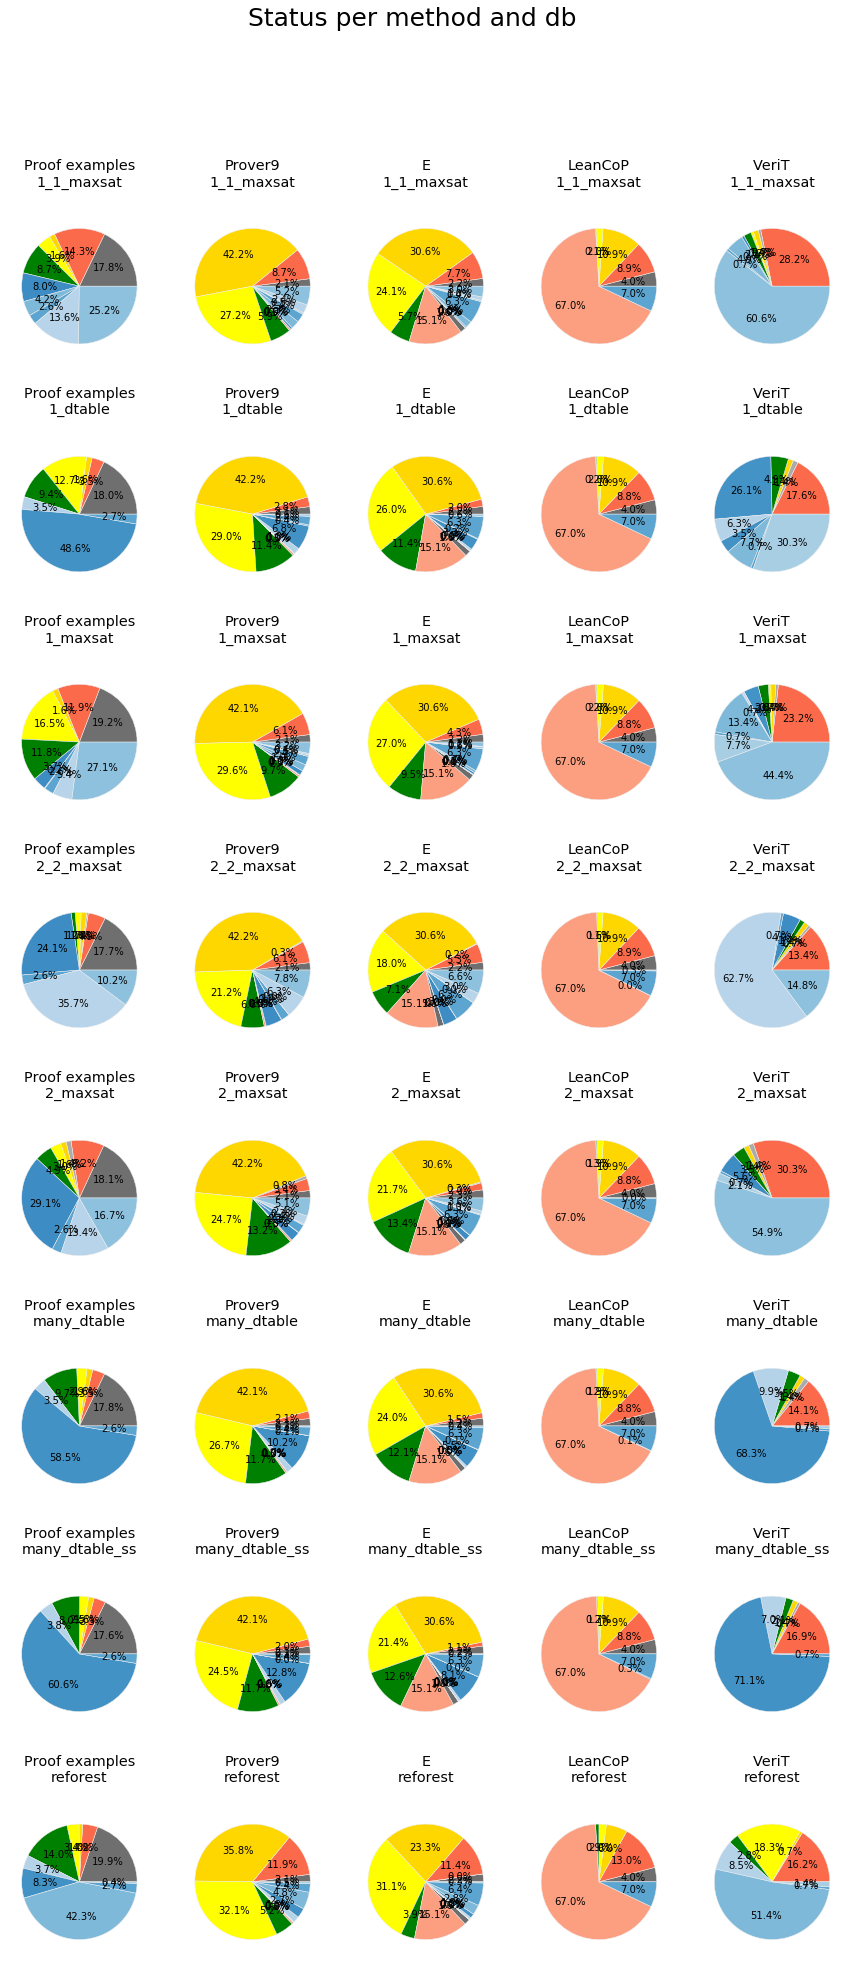

In [11]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(3*xsize,4*ysize))
plt.suptitle('Status per method and db', fontsize=25)
for j, (dbi, db) in enumerate(dbs.items()):
    for i, method in enumerate(methods):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, legend=False)

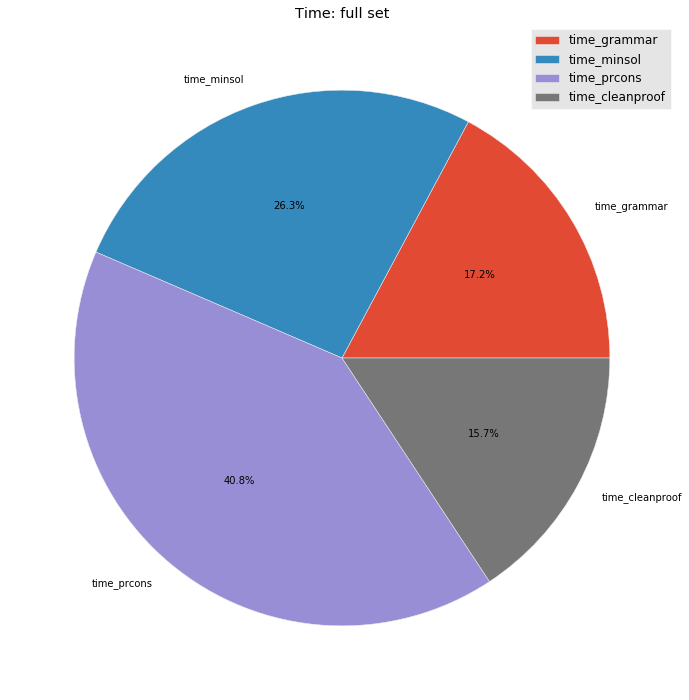

In [12]:
timecols = ['time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

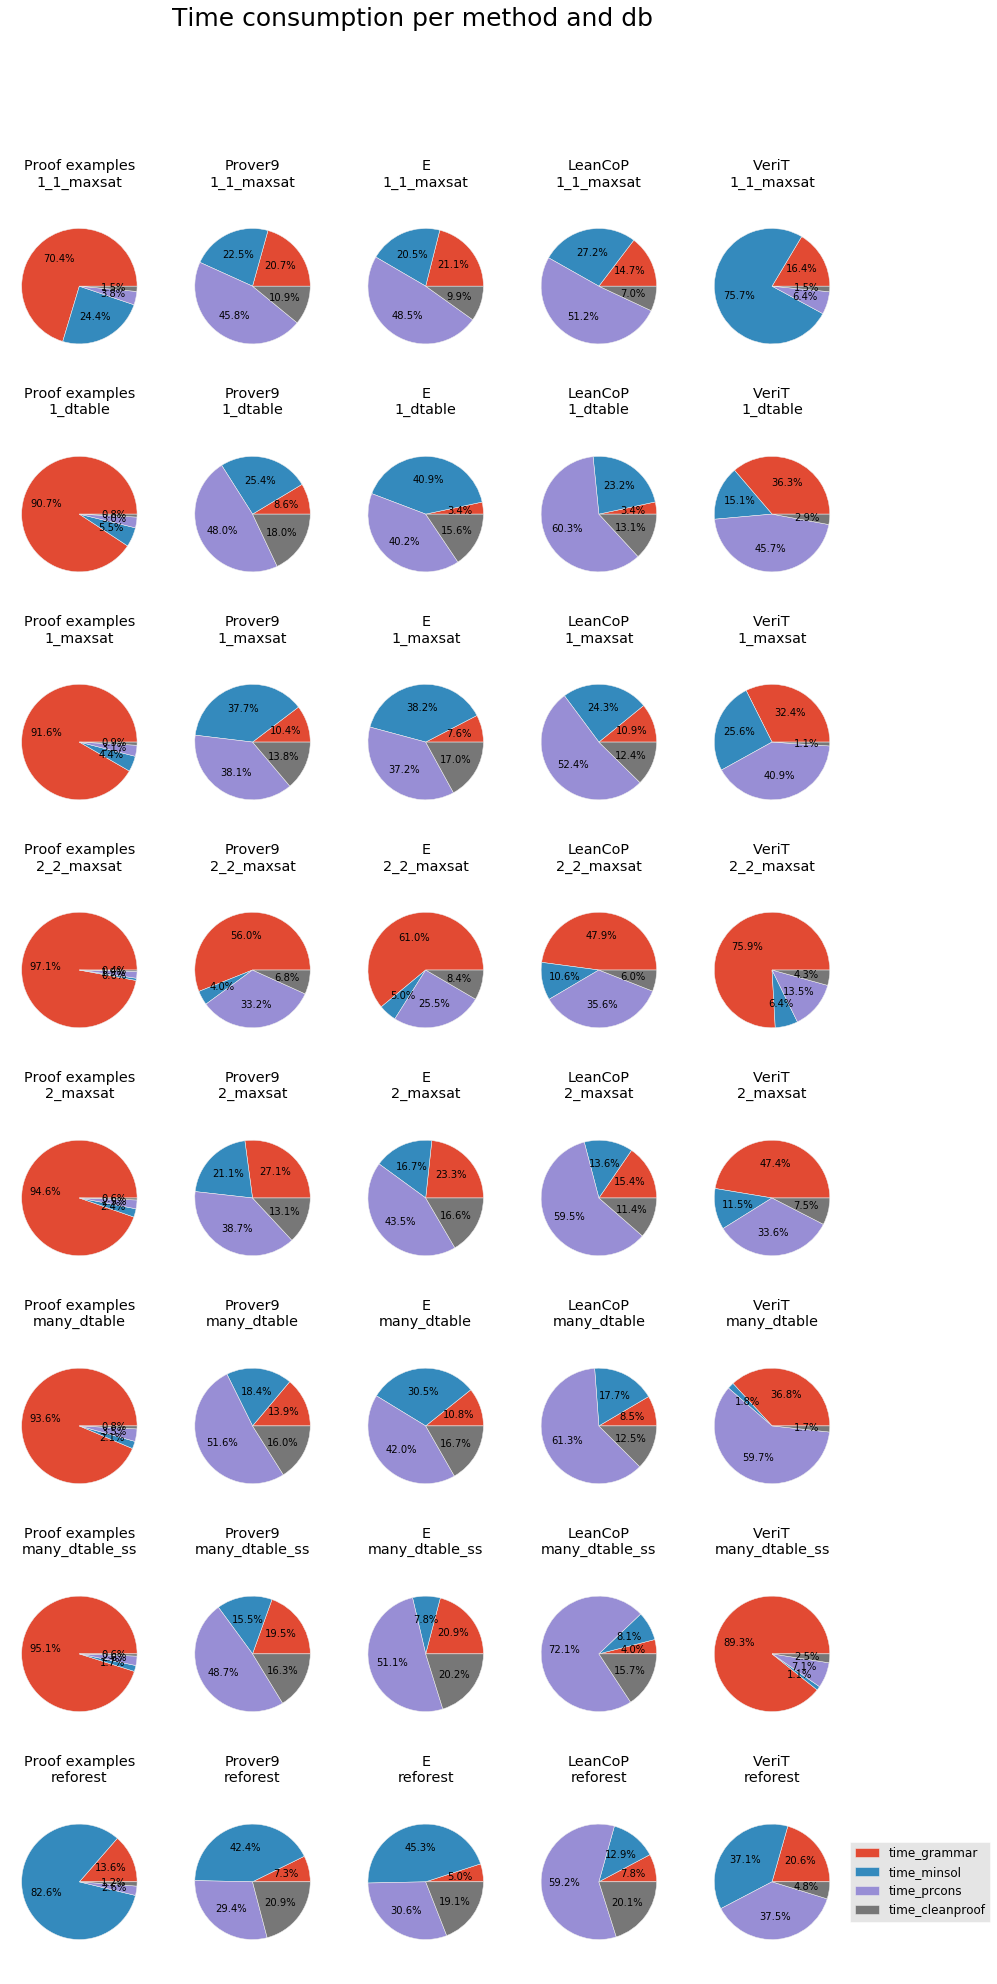

In [13]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(3*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

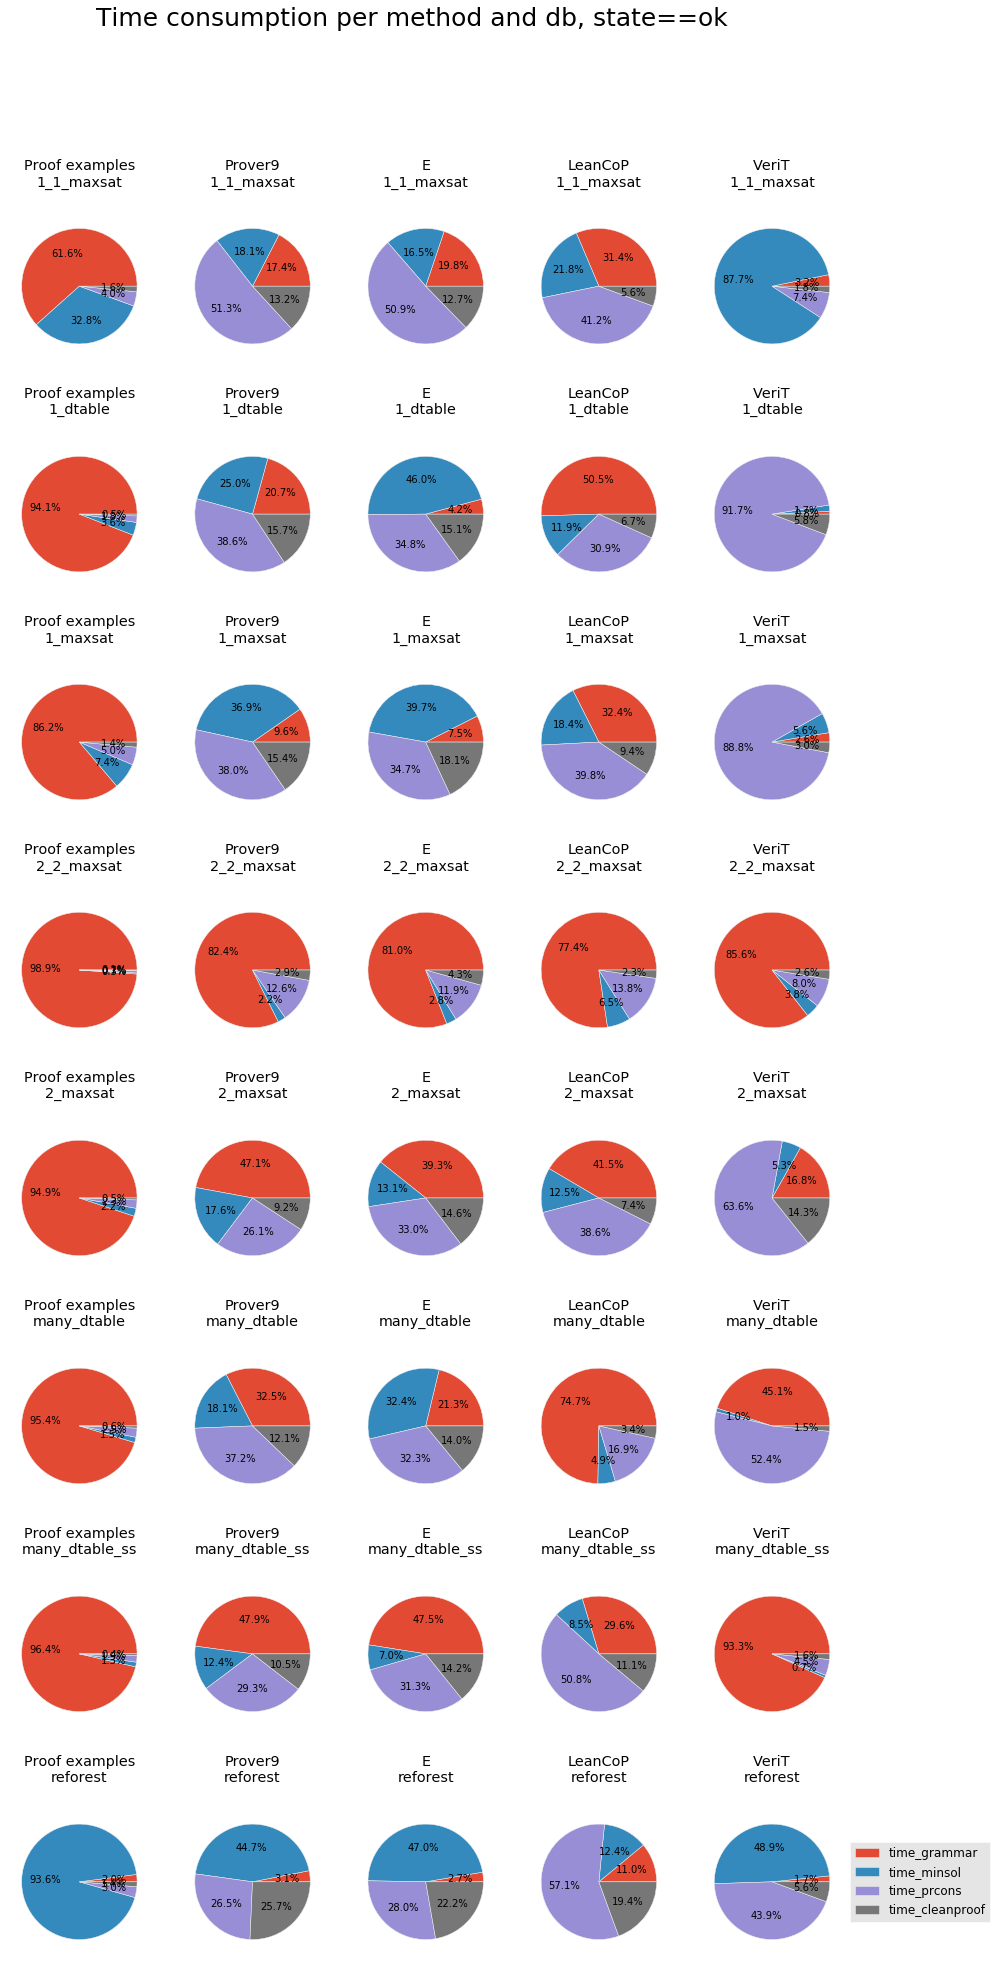

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(3*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
data['status'].value_counts()

parsing_other_exception         517874
cutintro_termset_trivial        212645
cutintro_uncompressible         141718
parsing_proof_not_found          66632
ok                               53379
timeout_parse                    33968
cutintro_other_exception         28056
timeout_grammar                  15302
cutintro_ehs_unprovable          14129
timeout_tseitin                  10978
timeout_minform                   5057
timeout_minsol                    4834
timeout_stabgrammar               4745
timeout_cutintro                  2103
timeout_prcons                    2024
cutintro_stack_overflow            431
timeout_cleanproof                 299
parsing_out_of_memory              256
timeout_beausol                    175
parsing_stack_overflow             131
cutintro_noncovering_grammar         7
Name: status, dtype: int64

In [16]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

file  grammar_size_dtable  \
81                       SquareEdges2DimExampleProof(10)                 19.0   
82                       SquareEdges2DimExampleProof(11)                 20.0   
83                       SquareEdges2DimExampleProof(12)                 21.0   
84                       SquareEdges2DimExampleProof(13)                 23.0   
85                       SquareEdges2DimExampleProof(14)                 24.0   
86                       SquareEdges2DimExampleProof(15)                 25.0   
87                       SquareEdges2DimExampleProof(16)                 26.0   
88                       SquareEdges2DimExampleProof(17)                 28.0   
89                       SquareEdges2DimExampleProof(18)                 29.0   
92                        SquareEdges2DimExampleProof(6)                 13.0   
93                        SquareEdges2DimExampleProof(7)                 15.0   
94                        SquareEdges2DimExampleProof(8)                 16.0   
95                        SquareEdges2DimExampleProof(9)                 17.0   
162    proofs/QF_UF/QG-classification/loops6/dead_dnd...                 76.0   
163    proofs/QF_UF/QG-classification/loops6/dead_dnd...                213.0   
164    proofs/QF_UF/QG-classification/loops6/dead_dnd...                 76.0   
165    proofs/QF_UF/QG-classification/loops6/dead_dnd...                206.0   
166    proofs/QF_UF/QG-classification/loops6/dead_dnd...                 76.0   
167    proofs/QF_UF/QG-classification/qg5/gensys_icl0...                114.0   
168    proofs/QF_UF/QG-classification/qg5/iso_brn054....                134.0   
169    proofs/QF_UF/QG-classification/qg5/iso_brn057....                128.0   
170    proofs/QF_UF/QG-classification/qg5/iso_brn059....                144.0   
171    proofs/QF_UF/QG-classification/qg5/iso_brn060....                199.0   
172    proofs/QF_UF/QG-classification/qg5/iso_brn063....                190.0   
173    proofs/QF_UF/QG-classification/qg5/iso_brn066....                193.0   
174    proofs/QF_UF/QG-classification/qg5/iso_icl003....                104.0   
175    proofs/QF_UF/QG-classification/qg5/iso_icl007....                121.0   
176    proofs/QF_UF/QG-classification/qg5/iso_icl055....                134.0   
177    proofs/QF_UF/QG-classification/qg5/iso_icl056....                151.0   
178    proofs/QF_UF/QG-classification/qg5/iso_icl058....                108.0   
179    proofs/QF_UF/QG-classification/qg5/iso_icl1041...                202.0   
180    proofs/QF_UF/QG-classification/qg5/iso_icl1262...                183.0   
181    proofs/QF_UF/QG-classification/qg5/iso_icl1264...                156.0   
182    proofs/QF_UF/QG-classification/qg5/iso_icl142....                132.0   
183    proofs/QF_UF/QG-classification/qg5/iso_icl237....                122.0   
184    proofs/QF_UF/QG-classification/qg5/iso_icl268....                113.0   
185    proofs/QF_UF/QG-classification/qg5/iso_icl269....                193.0   
186    proofs/QF_UF/QG-classification/qg5/iso_icl274....                184.0   
187    proofs/QF_UF/QG-classification/qg5/iso_icl285....                142.0   
188    proofs/QF_UF/QG-classification/qg5/iso_icl414....                138.0   
189    proofs/QF_UF/QG-classification/qg5/iso_icl415....                139.0   
190    proofs/QF_UF/QG-classification/qg5/iso_icl418....                176.0   
191    proofs/QF_UF/QG-classification/qg5/iso_icl419....                146.0   
192    proofs/QF_UF/QG-classification/qg5/iso_icl738....                130.0   
193    proofs/QF_UF/QG-classification/qg5/iso_icl739....                 97.0   
194    proofs/QF_UF/QG-classification/qg5/iso_icl993....                192.0   
195        proofs/QF_UF/SEQ/SEQ011_size2.smt2.proof_flat                 21.0   
196        proofs/QF_UF/SEQ/SEQ020_size2.smt2.proof_flat                 33.0   
198    proofs/QF_UF/eq_diamond/eq_diamond4.smt2.proof...                 16.0   
19

In [17]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

file  grammar_size_dtable  \
0               FactorialFunctionEqualityExampleProof(3)                 31.0   
1               FactorialFunctionEqualityExampleProof(4)                 36.0   
2             FactorialFunctionEqualityExampleProof2(10)                 24.0   
3             FactorialFunctionEqualityExampleProof2(11)                 26.0   
4             FactorialFunctionEqualityExampleProof2(12)                 27.0   
5              FactorialFunctionEqualityExampleProof2(2)                 11.0   
6              FactorialFunctionEqualityExampleProof2(3)                 13.0   
7              FactorialFunctionEqualityExampleProof2(4)                 15.0   
8              FactorialFunctionEqualityExampleProof2(5)                 17.0   
9              FactorialFunctionEqualityExampleProof2(6)                 18.0   
10             FactorialFunctionEqualityExampleProof2(7)                 20.0   
11             FactorialFunctionEqualityExampleProof2(8)                 21.0   
12             FactorialFunctionEqualityExampleProof2(9)                 23.0   
36                        SquareEdges2DimExampleProof(4)                 10.0   
37                        SquareEdges2DimExampleProof(5)                 12.0   
38                        SquareEdges2DimExampleProof(6)                 13.0   
39                        SquareEdges2DimExampleProof(7)                 15.0   
40                        SquareEdges2DimExampleProof(8)                 16.0   
42                           SquareEdgesExampleProof(14)                 13.0   
63                              SumOfOnesExampleProof(4)                 12.0   
64                              SumOfOnesExampleProof(5)                 15.0   
65                              SumOfOnesExampleProof(6)                 18.0   
66                              SumOfOnesExampleProof(7)                 21.0   
67                              SumOfOnesExampleProof(8)                 24.0   
78                  UniformAssociativity3ExampleProof(1)                 16.0   
79                  UniformAssociativity3ExampleProof(2)                 18.0   
80                  UniformAssociativity3ExampleProof(3)                 19.0   
81                  UniformAssociativity3ExampleProof(4)                 20.0   
82                  UniformAssociativity3ExampleProof(5)                 21.0   
83         proofs/QF_UF/SEQ/SEQ011_size2.smt2.proof_flat                 21.0   
84         proofs/QF_UF/SEQ/SEQ020_size2.smt2.proof_flat                 33.0   
86     proofs/QF_UF/eq_diamond/eq_diamond3.smt2.proof...                 10.0   
87     proofs/QF_UF/eq_diamond/eq_diamond4.smt2.proof...                 16.0   
88     proofs/QF_UF/eq_diamond/eq_diamond5.smt2.proof...                 25.0   
90      proofs/Solutions/AGT/AGT019+1/ET---0.2.THM-CRf.s                 51.0   
91      proofs/Solutions/AGT/AGT019+2/ET---0.2.THM-CRf.s                 50.0   
92      proofs/Solutions/AGT/AGT025+1/ET---0.2.THM-CRf.s                 55.0   
93      proofs/Solutions/AGT/AGT025+2/ET---0.2.THM-CRf.s                 44.0   
94     proofs/Solutions/AGT/AGT026+1/Vampire---4.0.TH...                 33.0   
95     proofs/Solutions/AGT/AGT026+1/VampireZ3---1.0....                 33.0   
96     proofs/Solutions/AGT/AGT026+1/leanCoP---2.2.TH...                 33.0   
97      proofs/Solutions/AGT/AGT026+2/ET---0.2.THM-CRf.s                 37.0   
98     proofs/Solutions/AGT/AGT026+2/Vampire---4.0.TH...                 45.0   
99     proofs/Solutions/AGT/AGT026+2/VampireZ3---1.0....                 26.0   
100    proofs/Solutions/AGT/AGT026+2/leanCoP---2.2.TH...                 29.0   
101    proofs/Solutions/ALG/ALG002-1/Metis---2.3.UNS-...                 42.0   
102    proofs/Solutions/ALG/ALG002-1/Prover9---1109a....                 24.0   
104     proofs/Solutions/ALG/ALG004-1/ET---0.2.UNS-CRf.s                 20.0   
107    proofs/Solutions/ALG/ALG011-1/Metis---2.3.UNS-...                 16.0   
11

In [18]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

file  grammar_size  \
57     proofs/Solutions/ALG/ALG074+1/ET---0.2.THM-CRf.s          14.0   
117   proofs/Solutions/ALG/ALG218+1/Vampire---4.0.TH...          47.0   
193   proofs/Solutions/ALG/ALG440-1/E---1.9.1.UNS-CRf.s          19.0   
194   proofs/Solutions/ALG/ALG440-1/E---FNT-1.9.1.UN...          19.0   
195    proofs/Solutions/ALG/ALG440-1/ET---0.2.UNS-CRf.s          21.0   
196   proofs/Solutions/ALG/ALG440-1/Prover9---1109a....          21.0   
197   proofs/Solutions/ALG/ALG440-1/Vampire---4.0.UN...          21.0   
199   proofs/Solutions/ALG/ALG441-1/E---FNT-1.9.1.UN...          23.0   
222   proofs/Solutions/BOO/BOO012-2/Prover9---1109a....          16.0   
224    proofs/Solutions/BOO/BOO012-3/ET---0.2.UNS-CRf.s          19.0   
237   proofs/Solutions/BOO/BOO016-1/Vampire---4.0.UN...          21.0   
303   proofs/Solutions/CAT/CAT028+1/E---1.9.1.THM-CRf.s          23.0   
304   proofs/Solutions/CAT/CAT028+1/E---FNT-1.9.1.TH...          23.0   
305   proofs/Solutions/CAT/CAT028+1/VampireZ3---1.0....          25.0   
363   proofs/Solutions/COM/COM008+1/Prover9---1109a....          20.0   
367   proofs/Solutions/COM/COM008+2/Prover9---1109a....          18.0   
379   proofs/Solutions/CSR/CSR007+1/Vampire---4.0.TH...          34.0   
381   proofs/Solutions/CSR/CSR013+1/Vampire---4.0.TH...          35.0   
557   proofs/Solutions/FLD/FLD008-3/Vampire---4.0.UN...          17.0   
558   proofs/Solutions/FLD/FLD008-4/SPASS---3.7.UNS-...          19.0   
561   proofs/Solutions/FLD/FLD011-3/SPASS---3.7.UNS-...          25.0   
565   proofs/Solutions/FLD/FLD014-3/Otter---3.3.UNS-...          16.0   
566   proofs/Solutions/FLD/FLD015-3/Beagle---0.9.22....          16.0   
567   proofs/Solutions/FLD/FLD015-3/E---1.9.1.UNS-CRf.s          20.0   
568   proofs/Solutions/FLD/FLD015-3/E---FNT-1.9.1.UN...          20.0   
574   proofs/Solutions/FLD/FLD018-3/E---1.9.1.UNS-CRf.s          18.0   
575   proofs/Solutions/FLD/FLD018-3/E---FNT-1.9.1.UN...          18.0   
582   proofs/Solutions/FLD/FLD026-3/VampireZ3---1.0....          23.0   
583   proofs/Solutions/FLD/FLD027-3/Beagle---0.9.22....          18.0   
601   proofs/Solutions/FLD/FLD040-3/E---1.9.1.UNS-CRf.s          20.0   
602   proofs/Solutions/FLD/FLD040-3/E---FNT-1.9.1.UN...          20.0   
603    proofs/Solutions/FLD/FLD040-3/ET---0.2.UNS-CRf.s          22.0   
604   proofs/Solutions/FLD/FLD040-5/E---1.9.1.UNS-CRf.s          25.0   
605   proofs/Solutions/FLD/FLD040-5/E---FNT-1.9.1.UN...          25.0   
621   proofs/Solutions/FLD/FLD057-3/Prover9---1109a....          27.0   
649   proofs/Solutions/FLD/FLD069-1/SPASS---3.7.UNS-...          22.0   
667   proofs/Solutions/GEO/GEO006-1/Prover9---1109a....          17.0   
668   proofs/Solutions/GEO/GEO006-1/SNARK---20120808...          17.0   
670   proofs/Solutions/GEO/GEO007-1/E---1.9.1.UNS-CRf.s          19.0   
671   proofs/Solutions/GEO/GEO007-1/E---FNT-1.9.1.UN...          19.0   
672    proofs/Solutions/GEO/GEO007-1/ET---0.2.UNS-CRf.s          19.0   
673   proofs/Solutions/GEO/GEO007-1/Vampire---4.0.UN...          19.0   
682   proofs/Solutions/GEO/GEO010-1/E---1.9.1.UNS-CRf.s          19.0   
683   proofs/Solutions/GEO/GEO010-1/E---FNT-1.9.1.UN...          19.0   
684   proofs/Solutions/GEO/GEO010-1/Vampire---4.0.UN...          18.0   
685   proofs/Solutions/GEO/GEO010-2/E---1.9.1.UNS-CRf.s          19.0   
686   proofs/Solutions/GEO/GEO010-2/E---FNT-1.9.1.UN...          19.0   
687    proofs/Solutions/GEO/GEO010-2/ET---0.2.UNS-CRf.s          18.0   
688   proofs/Solutions/GEO/GEO010-2/Vampire---4.0.UN...          18.0   
689   proofs/Solutions/GEO/GEO010-2/VampireZ3---1.0....          18.0   
...                                                 ...           ...   
4161  proofs/Solutions/SWB/SWB064+1/E---FNT-1.9.1.TH...          32.0   
4275   proofs/Solutions/SWC/SWC193-1/ET---0.2.UNS-CRf.s          33.0   
4333  proofs/Solutions/SWV/SWV189+1/Metis---2.3.THM-...          22.0   
4377  proofs/Solutions/SWV/SWV281-2/

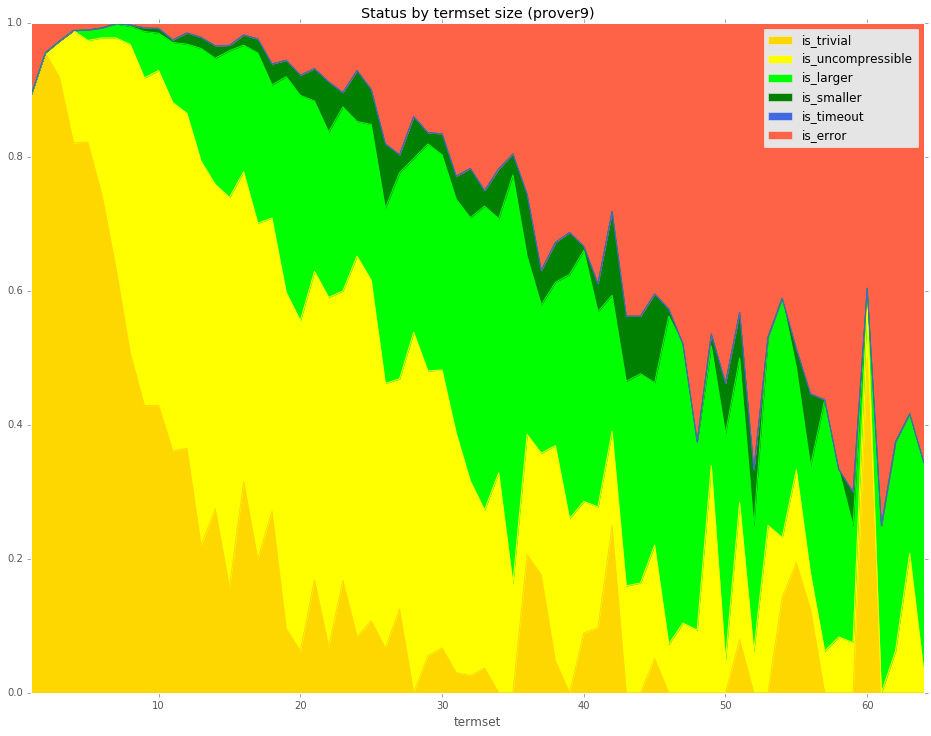

In [19]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_trivial'] = data.status.str.endswith('termset_trivial')
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_trivial & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_trivial', 'is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['gold', 'yellow', 'lime', 'green', 'royalblue', 'tomato'])

In [20]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input', 'beausol']]

file          method  \
543397                         SumOfOnesF2ExampleProof(10)        1_maxsat   
792738                         SumOfOnesF2ExampleProof(12)        1_dtable   
792741                         SumOfOnesF2ExampleProof(12)        1_maxsat   
615858                         SumOfOnesF2ExampleProof(14)        1_dtable   
615861                         SumOfOnesF2ExampleProof(14)        1_maxsat   
937269                         SumOfOnesF2ExampleProof(16)        1_maxsat   
141640                         SumOfOnesF2ExampleProof(18)      1_1_maxsat   
141646                         SumOfOnesF2ExampleProof(18)        1_maxsat   
317701                         SumOfOnesF2ExampleProof(20)        1_maxsat   
16846                          SumOfOnesF2ExampleProof(22)        1_maxsat   
1005730                         SumOfOnesFExampleProof(12)        1_dtable   
978877                          SumOfOnesFExampleProof(14)        1_maxsat   
524069                          SumOfOnesFExampleProof(18)        1_maxsat   
1064677                         SumOfOnesFExampleProof(20)        1_maxsat   
674412   proofs/Solutions/ALG/ALG073+1/VampireZ3---1.0....        reforest   
726829   proofs/Solutions/ALG/ALG210+2/SInE---0.4.THM-C...        1_maxsat   
556394   proofs/Solutions/ALG/ALG210+2/Vampire---4.0.TH...        1_dtable   
556397   proofs/Solutions/ALG/ALG210+2/Vampire---4.0.TH...        1_maxsat   
984378   proofs/Solutions/ALG/ALG210+2/VampireZ3---1.0....        1_dtable   
984376   proofs/Solutions/ALG/ALG210+2/VampireZ3---1.0....        2_maxsat   
163953   proofs/Solutions/ALG/ALG218+1/Vampire---4.0.TH...        2_maxsat   
1075315   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s      2_2_maxsat   
1075312   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s        2_maxsat   
1075318   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s  many_dtable_ss   
1075316   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s        reforest   
761536   proofs/Solutions/ALG/ALG223+2/Vampire---4.0.TH...        2_maxsat   
761542   proofs/Solutions/ALG/ALG223+2/Vampire---4.0.TH...  many_dtable_ss   
761540   proofs/Solutions/ALG/ALG223+2/Vampire---4.0.TH...        reforest   
162708    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s      2_2_maxsat   
162705    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s        2_maxsat   
162711    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s  many_dtable_ss   
162709    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s        reforest   
742691    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s      2_2_maxsat   
742688    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s        2_maxsat   
742694    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s  many_dtable_ss   
742692    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s        reforest   
251832   proofs/Solutions/ALG/ALG224+2/Vampire---4.0.TH...        2_maxsat   
251838   proofs/Solutions/ALG/ALG224+2/Vampire---4.0.TH...  many_dtable_ss   
251836   proofs/Solutions/ALG/ALG224+2/Vampire---4.0.TH...        reforest   
937791    proofs/Solutions/ALG/ALG226+1/ET---0.2.THM-CRf.s      1_1_maxsat   
937797    proofs/Solutions/ALG/ALG226+1/ET---0.2.THM-CRf.s        1_maxsat   
937792    proofs/Solutions/ALG/ALG226+1/ET---0.2.THM-CRf.s        2_maxsat   
605452    proofs/Solutions/ALG/ALG227+1/ET---0.2.THM-CRf.s        reforest   
491779    proofs/Solutions/ALG/ALG227+3/ET---0.2.THM-CRf.s      2_2_maxsat   
8232     proofs/Solutions/ALG/ALG386-1/SNARK---20120808...      1_1_maxsat   
8235     proofs/Solutions/ALG/ALG386-1/SNARK---20120808...        1_dtable   
8233     proofs/Solutions/ALG/ALG386-1/SNARK---20120808...        2_maxsat   
989108    proofs/Solutions/CSR/CSR087+4/ET---0.2.THM-CRf.s        reforest   
528571   proofs/Solutions/GEO/GEO083+1/E---1.9.1.THM-CRf.s      2_2_maxsat   
528568   proofs/Solutions/GEO/GEO083+1/E---1.9.1.THM-CRf.s        2_maxsat   
...                                                    ...             ...  

In [21]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

file          method  \
184121    proofs/Solutions/ALG/ALG073+1/ET---0.2.THM-CRf.s        2_maxsat   
424370   proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...        1_dtable   
424371   proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...      2_2_maxsat   
424369   proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...     many_dtable   
674412   proofs/Solutions/ALG/ALG073+1/VampireZ3---1.0....        reforest   
726829   proofs/Solutions/ALG/ALG210+2/SInE---0.4.THM-C...        1_maxsat   
556394   proofs/Solutions/ALG/ALG210+2/Vampire---4.0.TH...        1_dtable   
556397   proofs/Solutions/ALG/ALG210+2/Vampire---4.0.TH...        1_maxsat   
984378   proofs/Solutions/ALG/ALG210+2/VampireZ3---1.0....        1_dtable   
984376   proofs/Solutions/ALG/ALG210+2/VampireZ3---1.0....        2_maxsat   
163953   proofs/Solutions/ALG/ALG218+1/Vampire---4.0.TH...        2_maxsat   
1075315   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s      2_2_maxsat   
1075312   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s        2_maxsat   
1075318   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s  many_dtable_ss   
1075316   proofs/Solutions/ALG/ALG223+1/ET---0.2.THM-CRf.s        reforest   
761536   proofs/Solutions/ALG/ALG223+2/Vampire---4.0.TH...        2_maxsat   
761542   proofs/Solutions/ALG/ALG223+2/Vampire---4.0.TH...  many_dtable_ss   
761540   proofs/Solutions/ALG/ALG223+2/Vampire---4.0.TH...        reforest   
162708    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s      2_2_maxsat   
162705    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s        2_maxsat   
162711    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s  many_dtable_ss   
162709    proofs/Solutions/ALG/ALG223+3/ET---0.2.THM-CRf.s        reforest   
742691    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s      2_2_maxsat   
742688    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s        2_maxsat   
742694    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s  many_dtable_ss   
742692    proofs/Solutions/ALG/ALG224+1/ET---0.2.THM-CRf.s        reforest   
251832   proofs/Solutions/ALG/ALG224+2/Vampire---4.0.TH...        2_maxsat   
251838   proofs/Solutions/ALG/ALG224+2/Vampire---4.0.TH...  many_dtable_ss   
251836   proofs/Solutions/ALG/ALG224+2/Vampire---4.0.TH...        reforest   
937791    proofs/Solutions/ALG/ALG226+1/ET---0.2.THM-CRf.s      1_1_maxsat   
937797    proofs/Solutions/ALG/ALG226+1/ET---0.2.THM-CRf.s        1_maxsat   
937792    proofs/Solutions/ALG/ALG226+1/ET---0.2.THM-CRf.s        2_maxsat   
598127   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....      1_1_maxsat   
598130   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....        1_dtable   
598133   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....        1_maxsat   
598131   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....      2_2_maxsat   
598128   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....        2_maxsat   
598129   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....     many_dtable   
598134   proofs/Solutions/ALG/ALG227+1/Beagle---0.9.22....  many_dtable_ss   
605453    proofs/Solutions/ALG/ALG227+1/ET---0.2.THM-CRf.s        1_maxsat   
605451    proofs/Solutions/ALG/ALG227+1/ET---0.2.THM-CRf.s      2_2_maxsat   
605448    proofs/Solutions/ALG/ALG227+1/ET---0.2.THM-CRf.s        2_maxsat   
605454    proofs/Solutions/ALG/ALG227+1/ET---0.2.THM-CRf.s  many_dtable_ss   
605452    proofs/Solutions/ALG/ALG227+1/ET---0.2.THM-CRf.s        reforest   
121092    proofs/Solutions/ALG/ALG227+2/ET---0.2.THM-CRf.s      2_2_maxsat   
121089    proofs/Solutions/ALG/ALG227+2/ET---0.2.THM-CRf.s        2_maxsat   
121095    proofs/Solutions/ALG/ALG227+2/ET---0.2.THM-CRf.s  many_dtable_ss   
491775    proofs/Solutions/ALG/ALG227+3/ET---0.2.THM-CRf.s      1_1_maxsat   
491778    proofs/Solutions/ALG/ALG227+3/ET---0.2.THM-CRf.s        1_dtable   
491781    proofs/Solutions/ALG/ALG227+3/ET---0.2.THM-CRf.s        1_maxsat   
...                                                    ...             ...  

In [22]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

file          method  \
545935                            LinearEqExampleProof(10)      1_1_maxsat   
545940                            LinearEqExampleProof(10)        reforest   
834743                            LinearEqExampleProof(15)      1_1_maxsat   
135592                            LinearEqExampleProof(17)      1_1_maxsat   
346767                            LinearEqExampleProof(18)      1_1_maxsat   
14880                             LinearEqExampleProof(19)      1_1_maxsat   
625799                            LinearEqExampleProof(22)      1_1_maxsat   
73998                             LinearEqExampleProof(24)        1_maxsat   
618679                             LinearEqExampleProof(8)      1_1_maxsat   
471967                          SumOfOnesF2ExampleProof(8)      1_1_maxsat   
541044                           SumOfOnesFExampleProof(4)        reforest   
650140                           SumOfOnesFExampleProof(8)        reforest   
114175   proofs/Solutions/ALG/ALG073+1/SInE---0.4.THM-C...  many_dtable_ss   
424367   proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...      1_1_maxsat   
424373   proofs/Solutions/ALG/ALG073+1/SPASS---3.7.THM-...        1_maxsat   
467972   proofs/Solutions/ALG/ALG074+1/Prover9---1109a....        reforest   
1068222  proofs/Solutions/BOO/BOO011-4/Prover9---1109a....  many_dtable_ss   
614196    proofs/Solutions/BOO/BOO012-3/ET---0.2.UNS-CRf.s        reforest   
849376    proofs/Solutions/CSR/CSR079+4/ET---0.2.THM-CRf.s        2_maxsat   
1042040  proofs/Solutions/CSR/CSR084+4/Vampire---4.0.TH...        2_maxsat   
198101   proofs/Solutions/CSR/CSR090+4/E---1.9.1.THM-CRf.s        reforest   
636892   proofs/Solutions/CSR/CSR090+4/E---FNT-1.9.1.TH...        reforest   
27265     proofs/Solutions/CSR/CSR091+4/ET---0.2.THM-CRf.s        2_maxsat   
137809   proofs/Solutions/CSR/CSR094+4/E---1.9.1.THM-CRf.s        2_maxsat   
30745    proofs/Solutions/CSR/CSR094+4/E---FNT-1.9.1.TH...        2_maxsat   
589128    proofs/Solutions/CSR/CSR094+4/ET---0.2.THM-CRf.s        2_maxsat   
357621   proofs/Solutions/CSR/CSR105+2/Vampire---4.0.TH...        1_maxsat   
248085   proofs/Solutions/CSR/CSR105+5/Vampire---4.0.TH...        1_maxsat   
833564   proofs/Solutions/CSR/CSR106+4/E---1.9.1.THM-CRf.s        reforest   
817012   proofs/Solutions/CSR/CSR106+4/E---FNT-1.9.1.TH...        reforest   
600044    proofs/Solutions/CSR/CSR106+4/ET---0.2.THM-CRf.s        reforest   
110455   proofs/Solutions/CSR/CSR107+4/E---1.9.1.THM-CRf.s  many_dtable_ss   
319150   proofs/Solutions/CSR/CSR107+4/E---FNT-1.9.1.TH...  many_dtable_ss   
1020868  proofs/Solutions/GEO/GEO013-3/SPASS---3.7.UNS-...        reforest   
164573   proofs/Solutions/GEO/GEO093-1/SPASS---3.7.UNS-...        reforest   
482980   proofs/Solutions/GRA/GRA004+1/Prover9---1109a....        reforest   
543643   proofs/Solutions/GRP/GRP009-1/E---1.9.1.UNS-CRf.s      2_2_maxsat   
543640   proofs/Solutions/GRP/GRP009-1/E---1.9.1.UNS-CRf.s        2_maxsat   
543646   proofs/Solutions/GRP/GRP009-1/E---1.9.1.UNS-CRf.s  many_dtable_ss   
785163   proofs/Solutions/GRP/GRP009-1/E---FNT-1.9.1.UN...      2_2_maxsat   
785160   proofs/Solutions/GRP/GRP009-1/E---FNT-1.9.1.UN...        2_maxsat   
785166   proofs/Solutions/GRP/GRP009-1/E---FNT-1.9.1.UN...  many_dtable_ss   
399960    proofs/Solutions/GRP/GRP009-1/ET---0.2.UNS-CRf.s        2_maxsat   
309732   proofs/Solutions/GRP/GRP012-1/Metis---2.3.UNS-...        reforest   
868365   proofs/Solutions/GRP/GRP012-3/Beagle---0.9.22....        1_maxsat   
868360   proofs/Solutions/GRP/GRP012-3/Beagle---0.9.22....        2_maxsat   
1002031  proofs/Solutions/GRP/GRP133-1.003/Prover9---11...      1_1_maxsat   
780324   proofs/Solutions/GRP/GRP455-1/Beagle---0.9.22....        reforest   
120397   proofs/Solutions/GRP/GRP458-1/Beagle---0.9.22....        reforest   
1071612  proofs/Solutions/GRP/GRP461-1/E---1.9.1.UNS-CRf.s        reforest   
...                                                    ...             ...  

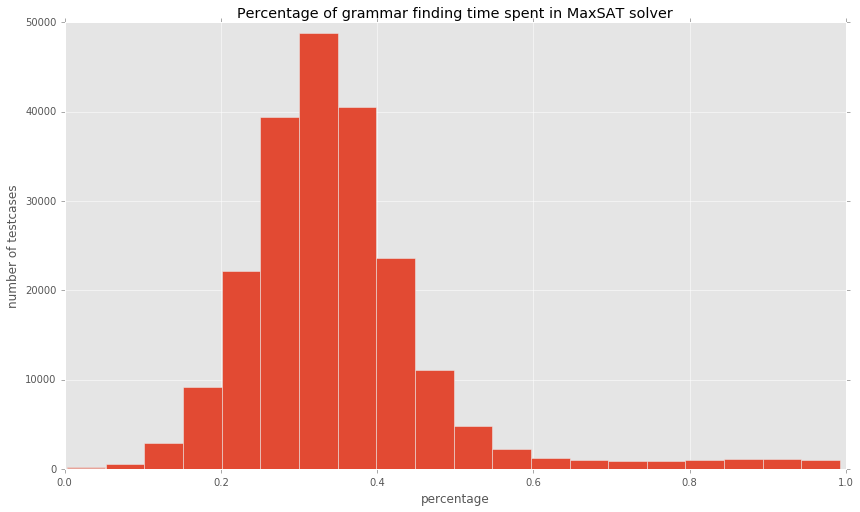

In [23]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')

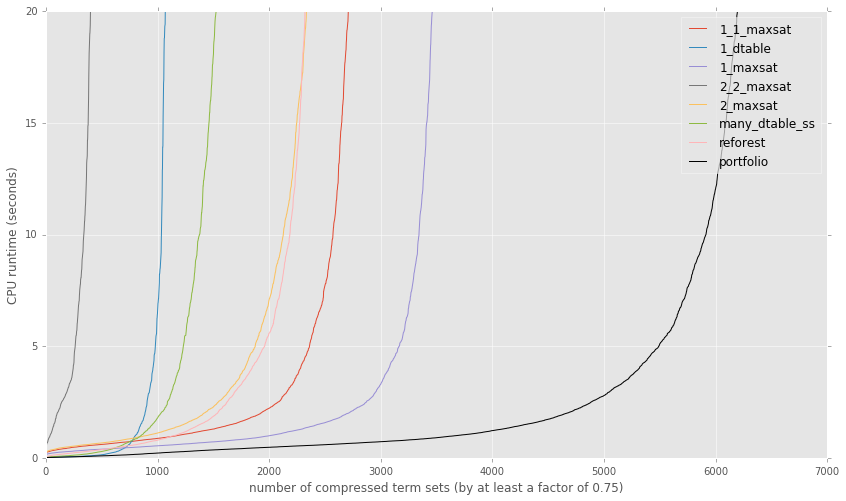

In [24]:
plt.figure(figsize=(14,8))

tstp_dataset = \
    (data.grammar_size>0)& \
    (data.grammar_size<0.75*data.termset)& \
    (data.termset_trivial==False)& \
    (data.file.str.contains('Solution'))
for method in methods:
    if method != 'many_dtable':
        plt.plot(
            data[(data.method==method)&tstp_dataset].
                time_grammar.sort_values().values / 1000,
            label=method)

portfolio = data[tstp_dataset].groupby('file').time_grammar.min()
plt.plot(portfolio.sort_values().values / 1000, label='portfolio', color='black')

plt.xlabel('number of compressed term sets (by at least a factor of 0.75)')
plt.ylabel('CPU runtime (seconds)')
plt.ylim(0,20)
plt.legend(loc='upper right', framealpha=0.7)
plt.savefig('cactus.pdf')

In [25]:
for _, row in data[(data.beausol_scomp < 100) & (data.beausol_lcomp > 6) & (data.beausol_scomp > 0)] \
        .sort_values('beausol_scomp').iterrows():
    print(row.beausol, "\t", row.file)

['(n4 ⊃ n7) ∧ (n8 ⊃ n3)'] 	 proofs/Solutions/SYN/SYN037-1/Vampire---4.0.UNS-Ref.s
['m2 ⊃ m1 ∨ m3 ∨ p(x1)'] 	 proofs/Solutions/SYN/SYN037-2/Metis---2.3.UNS-CRf.s
['m2 ⊃ m1 ∨ m3 ∨ p(x)'] 	 proofs/Solutions/SYN/SYN037-2/Metis---2.3.UNS-CRf.s
['m1 ∧ m2 ⊃ m3 ∨ q(x1)'] 	 proofs/Solutions/SYN/SYN037-2/SNARK---20120808r022.UNS-Ref.s
['m1 ∧ m3 ⊃ m2 ∨ q(x1)'] 	 proofs/Solutions/SYN/SYN037-2/E---FNT-1.9.1.UNS-CRf.s
['m1 ∧ m3 ⊃ m2 ∨ q(x)'] 	 proofs/Solutions/SYN/SYN037-2/E---FNT-1.9.1.UNS-CRf.s
['m1 ∧ m3 ⊃ m2 ∨ q(x)'] 	 proofs/Solutions/SYN/SYN037-2/E---1.9.1.UNS-CRf.s
['m1 ∧ m2 ⊃ m3 ∨ q(x)'] 	 proofs/Solutions/SYN/SYN037-2/SNARK---20120808r022.UNS-Ref.s
['m1 ∧ m3 ⊃ m2 ∨ q(x1)'] 	 proofs/Solutions/SYN/SYN037-2/E---1.9.1.UNS-CRf.s
['m2 ∧ p(fy3(x)) ⊃ m1 ∨ m3'] 	 proofs/Solutions/SYN/SYN037-2/Otter---3.3.UNS-Ref.s
['m2 ∧ p(fy3(x1)) ⊃ m1 ∨ m3'] 	 proofs/Solutions/SYN/SYN037-2/Otter---3.3.UNS-Ref.s
['m1 ∧ p(x1) ⊃ m3 ∨ p(x2)'] 	 proofs/Solutions/SYN/SYN037-2/ET---0.2.UNS-CRf.s
['cC60(#v(B0_0: i)) ⊃\n  c